# Trabajo Semanal N°5 : 'Estimacion Espectral: Ancho de Banda de Señales Reales'
### Alumno: Magdalena Guida

### APS - 2do cuatrimestre 2025


En el siguiente trabajo se llevara a cabo un proceso para determinar como se distribuye la energia de determinadas señales en funcion de la frecuencia. Para esto, se utilizaron 4 señales reales: 
- ECG- Electrocardiograma
- PPG - Fotopletismografia
- Audio: La cucaracha
- Audio: Silvido

Se diseño un codigo para aplicarles el metodo de Welch, y asi poder calcular su Ancho de Banda entre percentiles. Es decir, entre que frecuencias se encuentra un determinado porcentaje de energia acumulada.

La estimacion espectral mediante el Metodo Welch, permite obtener una representacion mas estable del contenido frecuencial de una señal, reduciendo la varianza inherente al periodograma clasico. Su procedimiento, se basa en dividir la señal e multiples segmentos, aplicarle una ventana a cada uno para mitigar la fuga espectral, calcular la transformada rapida de Foourier, y promediar los espectros resultantes. En el codigo se implementa de la siguiente manera: ingresa una señal, y se la divide en una determinada catidad de segmento *cant_promedio*, que sera una de las variables que funcione como *perilla*. Mayor sea la cantidad de promedios, menor sera la varianza, pero si se lo aumenta demasiado, se puede distorcionar la informacion de la señal, modificando la ubicacion de los picos de enrgia o perdiendo demasiados detalles. *nperseg* representa la cantidad de muestras por segmento, se calcula como *N* total sobre la cantidad de promedios, se busco que tenga un valor minimo de 1500 muestras. La segunda variable importante, *mult_nfft*, que representa el factor ue multiplica el largo de la señal,luego de agregarlo el zero-padding. Por ejemplo, si *mult_nfft*$ = 4$, el largo de la señal, post zero-padding, sera 4 veces mayor al original. Este factor, mejora la interpolacion espectral y permite una visualizacion mas detallada del espectro, sin alterar la resolucion real. La tercer variable, sera la eleccion de una ventana *win* para atenuar los extremos de los segmentos sin perder la definicion de los picos de energia. Para el analisis de cada señal, se bucaron valores de los parametro que permitan el equilibrio justo entre la estabilidad estadistica y la fidelidad espectral, para asi poder definir el ancho de banda efectivo. 

El ancho de banda efectivo, se definio como el rango espectral que contiene el 98% de la energia de la señal. este criterio es util para caracterizar señales con contenido espectral disperso, ya que permite cuantificar la cincentracionenergetica sindepender de un¿mbrales fijos como el de 3dB. Para aplicarlo al codigo, se desarrollo un codigo que opera sobre la estimacion espectral obtenida en el Metodo Welch. Primero se construye la curva de energia acumulada de la señal, con la funcion *np.cumsum*, y se la divide por la energia total: el ultimo objeto del vector. asi se obtiene la energia total normalizada,*pot_norm*, una funcioncreciente entre 0 y 1, que representa la proporcion acumulada de energia. Para definir la frecuencia minima  y maxima del ancho de banda, se interpola la frecuencia correposdiente a los limites de energia dispuestos, y se busca el indice asociado en el vector de frecuencias. Se grafica el ancho de banda con lineas de guiones rojas y se presenta una tabla con sus valores. 

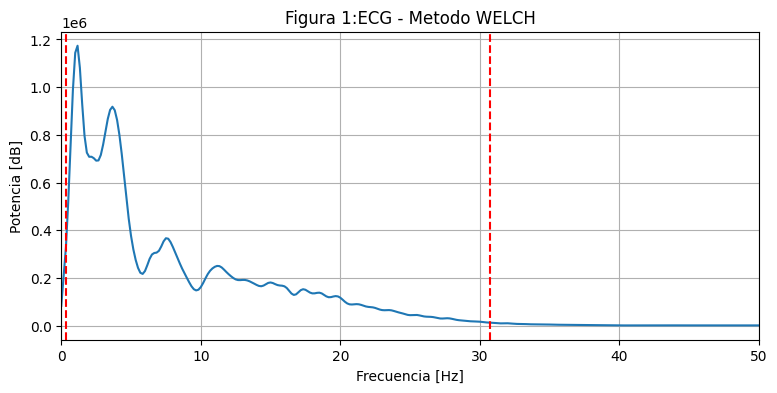

In [2]:
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt
import scipy.io as sio

#%%

################## ##################
# Lectura de ECG   # ECG sin ruido
################## #################

fs_ecg = 1000 # Hz

ecg = np.load('ecg_sin_ruido.npy')
N = len(ecg)
df1 = fs_ecg / N

#------------------------ DEF WELCH---------------------------------------------#

cant_promedio = 20              
nperseg = ecg.shape[0] // cant_promedio
mult_nfft = 4
win = 'hamming'
f_ecg_w, ecg_w = sig.welch(ecg, fs_ecg, nperseg=nperseg, window= win, axis = 0, nfft = mult_nfft*nperseg)

pot_acumulada_ecg = np.cumsum(ecg_w) 
pot_total_ecg = pot_acumulada_ecg[-1] 
pot_norm_ecg = pot_acumulada_ecg / pot_total_ecg  
porc_pot = 99
f_97_ecg = np.interp(porc_pot/100, pot_norm_ecg, f_ecg_w[:N//2])
idx1_ecg = np.searchsorted(f_ecg_w[:N//2], f_97_ecg)
idx2_ecg = np.searchsorted(pot_norm_ecg, pot_norm_ecg[pot_norm_ecg > 0.01][0])  # Ajusta el umbral si es necesario
f_lower_ecg = f_ecg_w[idx2_ecg]

#--------------------------------graf ------------------------------------#
plt.figure(figsize=(9, 4))
plt.plot(f_ecg_w, ecg_w)
plt.title('Figura 1:ECG - Metodo WELCH')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0,50)
plt.ylabel('Potencia [dB]')
plt.axvline(x=f_lower_ecg, color='r', linestyle='--')
plt.axvline(x=f_97_ecg, color='r', linestyle='--')
plt.grid(True)
plt.show()

La Figura 1, la estimacion espectral mediante metodo de welch de la señal de ECG, se observa una concentracion de energia en frecuencias bajas, con una caida progresiva hacia los 40Hz. Esta representacion fue construida definiendo 20 segmentos de 1500 muestras, aplicandole un zero-padding de 4 veces su longitud y ventaneando con Bartlett, que permitieron reducur la varianza y obtener una curva mas estable. Los valores de frecuencias del ancho de banda son: $[0.33; 30.75]Hz$, lo que es coherente con la fisiologia cardiaca, donde los componenetes mas significativos, ondas P, QRS y T, se concentran en ese rango. 

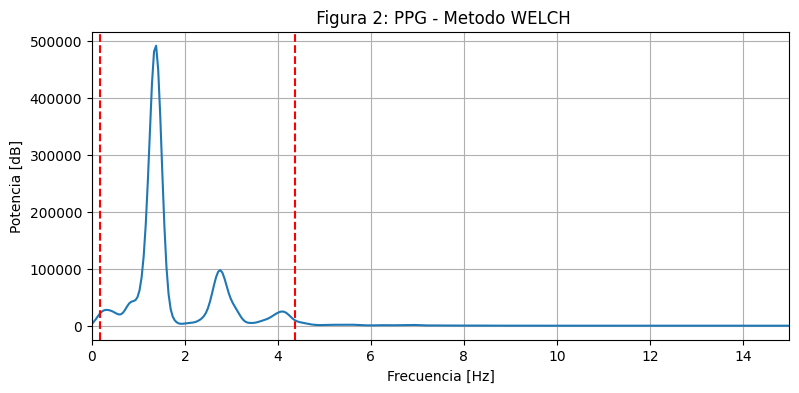

In [4]:
##################
#  PPG sin ruido
##################

ppg = np.load('ppg_sin_ruido.npy')
fs_ppg = 400
N2 = len(ppg) 
df2 = fs_ppg / N2

ppg_fft = np.fft.fft(ppg, axis = 0) /N2
cant_promedio2 = 20                ## cambiar esrto me significa cambios en la varianza 
nperseg2 = ppg.shape[0] // cant_promedio2
mult_nfft2 = 4
win2 = 'hann'
f_ppg_w, ppg_w = sig.welch(ppg, fs_ppg, nperseg=nperseg2, window= win2, axis = 0, nfft = mult_nfft2*nperseg2)

pot_acumulada_ppg = np.cumsum(ppg_w) 
pot_total_ppg = pot_acumulada_ppg[-1] 
pot_norm_ppg = pot_acumulada_ppg / pot_total_ppg  

porc_pot1 = 98
f_97_ppg = np.interp(porc_pot1/100, pot_norm_ppg, f_ppg_w[:N//2])
idx1_ppg = np.searchsorted(f_ppg_w[:N2//2], f_97_ppg)
idx2_ppg = np.searchsorted(pot_norm_ppg, pot_norm_ppg[pot_norm_ppg > 0.01][0])  # Ajusta el umbral si es necesario
f_lower_ppg = f_ppg_w[idx2_ppg]
#--------------------------------graf ------------------------------------#

plt.figure(figsize=(9, 4))
plt.plot(f_ppg_w, ppg_w)
plt.title(' Figura 2: PPG - Metodo WELCH')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0,15)
plt.ylabel('Potencia [dB]')
plt.axvline(x=f_lower_ppg, color='r', linestyle='--')
plt.axvline(x=f_97_ppg, color='r', linestyle='--')
plt.grid(True)
plt.show()

Para la estimacion del ppg, se definieron 20 segmentos con un largo de 2245 muestras, un zero-padding de *mult_nfft2 = 4* y la ventana Hann. Lo que permitio reducir la varianza espectral y una representacion mas estable del contenido frecuencial. La señal presenta su picos dominantes en los valores de $0.5Hz$ y  $3.5Hz$, y el BW se definio entre las frecuencias:  $[0.18; 4.4]Hz$. A diferencia de las demas señales, se uso como limite superior el 98%, porque, sise usaba hasta el 99%, se incluian frecuencias con valores que no aportaban a la caracterizacion del ancho de banda efectivo. El rango resultante, es coherente con la naturaleza pulsatil de la señal PPG, donde la frecuencia cardiaca y sus armonicos suelen concentrarse por debajo de los $5Hz$ .

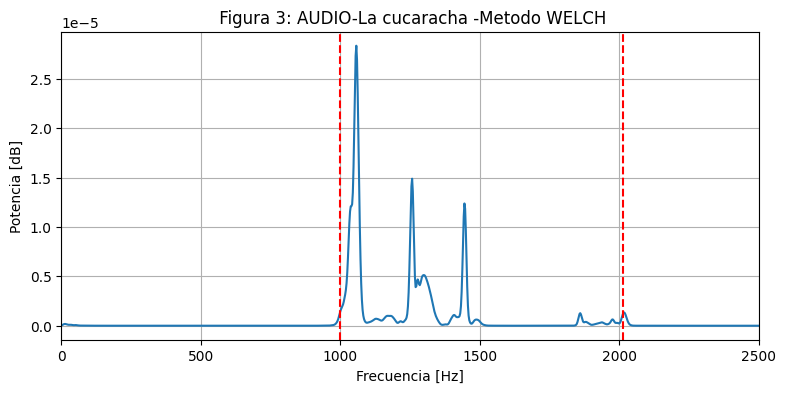

In [5]:
# ####################
#  Lectura de audio #
# ####################

fs_audio, wav_data = sio.wavfile.read('la cucaracha.wav')
N3= len(wav_data)
df3 = fs_audio / N3

#------------------------ DEF WELCH---------------------------------------------#
cant_promedio3 = 30                
nperseg3 = wav_data.shape[0] // cant_promedio3
mult_nfft3 = 4
win3 = 'bartlett'
f_audio_w, audio_w = sig.welch(wav_data, fs_audio, nperseg=nperseg3, window= win3, axis = 0, nfft = mult_nfft3*nperseg3)

energia_t_audio = np.sum(audio_w)
pot_acumulada_audio = np.cumsum(audio_w) 
pot_total_audio = pot_acumulada_audio[-1] 
pot_norm_audio = pot_acumulada_audio / pot_total_audio  
porc_pot2 = 99
f_97_audio = np.interp(porc_pot2/100, pot_norm_audio, f_audio_w[:N//2])
idx1_audio = np.searchsorted(f_audio_w[:N//2], f_97_audio)
idx2_audio = np.searchsorted(pot_norm_audio, pot_norm_audio[pot_norm_audio > 0.01][0])  # Ajusta el umbral si es necesario
f_lower_audio = f_audio_w[idx2_audio]

#--------------------------------graf ------------------------------------#
plt.figure(figsize=(9, 4))
plt.plot(f_audio_w, audio_w)
plt.title(' Figura 3: AUDIO-La cucaracha -Metodo WELCH')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0,2500)
plt.ylabel('Potencia [dB]')
plt.axvline(x=f_lower_audio, color='r', linestyle='--')
plt.axvline(x=f_97_audio, color='r', linestyle='--')
plt.grid(True)
plt.show()

Para la señal de audio, se definieron 30 segmentos, de 4800 muestras y se les aplico la ventana 'Bartlette'. La estimacion revela multiples picos bien definidos entre los $1000Hz$ y $1500Hz$, y se define el BW: $[1000; 2013.84]Hz$, que refleja adecuadamente a la voz humana, donde las frecuencias fundamentales suelen estar entre los $100Hz$ y $3kHz$ aproximadamente. 

Por ultimo, se presenta una tabla con las cotas inferiores y superiores del ancho de banda para cada una de las señales.

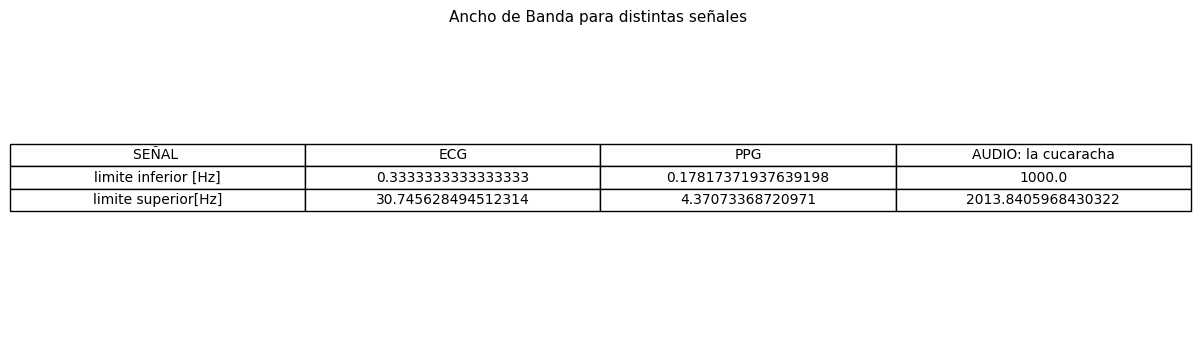

In [6]:
# Crear tabla con los encabezados fijos
tabla = [
    ["SEÑAL ",     "ECG",      "PPG",      "AUDIO: la cucaracha"],
    ["limite inferior [Hz]", f_lower_ecg, f_lower_ppg, f_lower_audio ],
    ["limite superior[Hz]", f_97_ecg,  f_97_ppg, f_97_audio],
]
# Mostrar como imagen
fig, ax = plt.subplots(figsize=(12, 2 + len(tabla)*0.5))
ax.axis('tight')
ax.axis('off')
plt.title("Ancho de Banda para distintas señales ", fontsize=11, pad=1)
table = ax.table(cellText=tabla, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.tight_layout()
plt.show()

A lo largo de este trabajo se aplico el Metodo de Welch para la estimacion de señales de distintas naturalezas: fisiologicas, ECG y PPG, y acusticas, voz. Se implementaron criteriosde energia acumulada para definir el ancho de banda efectivo permitiendo identificar el rango de frecuencias que cincentra la energia que caracteriza a la señal. La parametrizacion cuidadosa de los parametros del metodo Welch, permitieron controlar el balance entre la varianza espectral y la definicion de picos,optimizando la interpreteacion en cada caso. En la señal ECG, el BW se concentro por debajo de los $50Hz$, reflejando la fisiologia cardiaca, para el PPG, se observo una concentracion entre los $0.5Hz$ y los $3.5Hz$, coherente cn la dinamica pulsatil y la señal de audio entre los $1kHz$ y $2kHz$ como la voz. estos resultaods validan la utilidad del metodo de Welch y el enfoque acumulativo de energia. 